In [2]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
import numpy as np
from itertools import product

from sailing import SailingGridworld
from common import helper as h

/home/lix16/miniconda3/envs/e8125/lib/python3.8/site-packages/glfw/__init__.py:906: GLFWError: (65544) b'X11: The DISPLAY environment variable is missing'
  warnings.warn(message, GLFWError)


In [64]:
gamma = 0.9
eps = 1e-4 # TODO: use this value for Task 2 and Task 3
value_update_iter = 100 # TODO: change this in Task 2
rock_penalty = -2 # TODO: change this in Q1.3

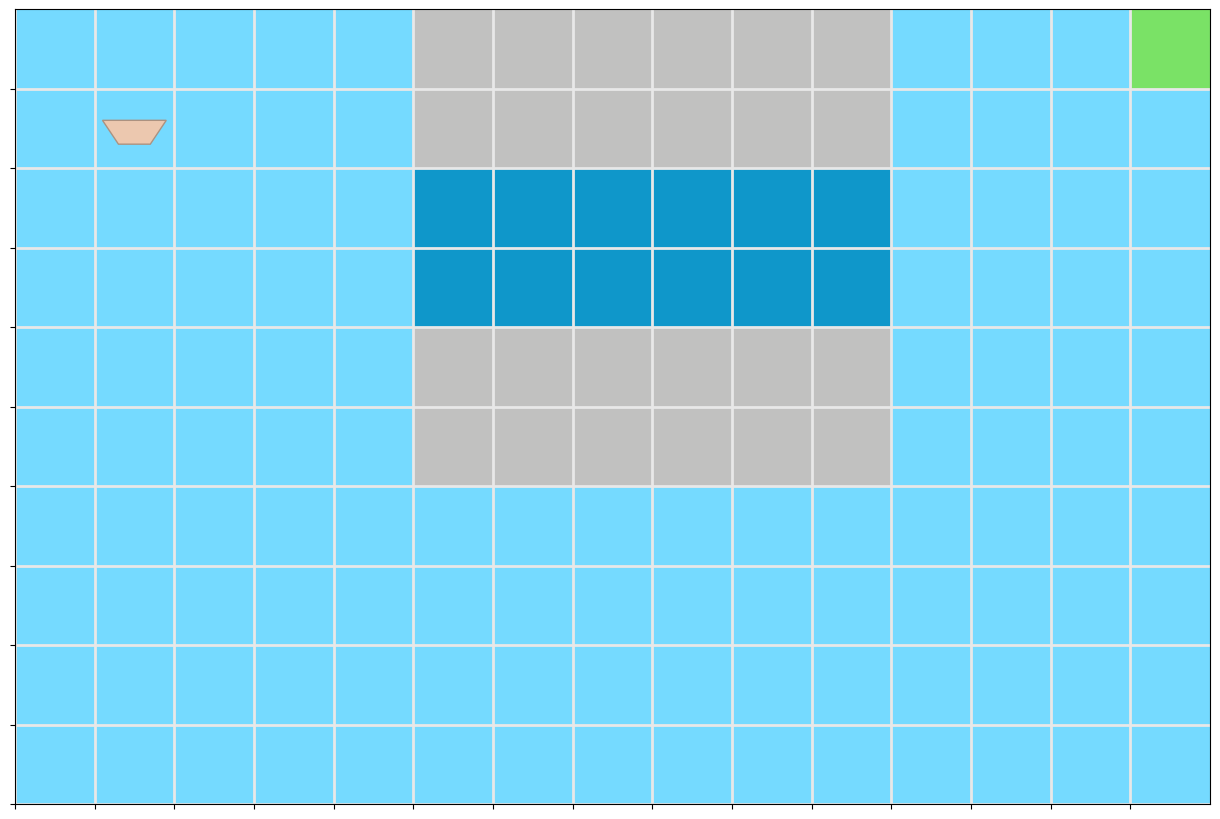

In [65]:
# Set up the environment
env = SailingGridworld(rock_penalty=rock_penalty, value_update_iter=value_update_iter)

In [66]:

def get_values_policy(iterations):
    v_est = np.zeros((env.w, env.h))
    policy = np.zeros((env.w, env.h))
    env.draw_values_policy(v_est, policy)

    for k in range(iterations):
        # TODO: Task 1, implement the value iteration and policy
        # TODO: Task 2, convergency of the value function and policy

        ########## Your code starts here ##########
        
        # Estimate new state values and calculate policy
        v_est0 = v_est.copy()
        for i in range(env.w):
            for j in range(env.h):
                v = -10000
                for a in range(env.n_actions):
                    v0 = 0
                    for st, re, done, prob in env.transitions[i, j, a]:
                        if st is not None:
                            v0 += prob * (re + .9 * v_est0[st[0], st[1]])
                    v = max(v, v0)
                v_est[i, j] = v
        print(f'{k}, {np.max(np.abs(v_est - v_est0))}')
        print(f'Value converged: {np.count_nonzero(np.abs(v_est - v_est0) < .0001)}')
        p0 = policy.copy()
        for i in range(env.w):
            for j in range(env.h):
                v = -1000
                for a in range(env.n_actions):
                    v0 = 0
                    for st, re, done, prob in env.transitions[i, j, a]:
                        if st is not None:
                            v0 += prob * (re + .9 * v_est[st[0], st[1]])
                    if v0 > v:
                        v = v0
                        policy[i, j] = a
        print(f'Policy converged: {np.count_nonzero(np.abs(policy - p0) < .0001)}')

        
        # Call env.draw_values_policy function after each iteration with your estimated state values and policy
        # to produce a GIF of the changing values (will be automatically created and saved)
        env.draw_values_policy(v_est, policy)
        
        ########## Your code ends here ##########

    return v_est, policy


In [67]:
# value iteration -- update value estimation and policy
value_est, policy = get_values_policy(iterations=value_update_iter)

0, 9.0
Value converged: 140
Policy converged: 129
1, 7.695
Value converged: 137
Policy converged: 147
2, 6.561000000000001
Value converged: 133
Policy converged: 147
3, 5.609655000000001
Value converged: 129
Policy converged: 146
4, 4.7949264225000015
Value converged: 128
Policy converged: 145
5, 4.099662091237501
Value converged: 124
Policy converged: 143
6, 3.5030318477574385
Value converged: 118
Policy converged: 143
7, 2.991816831735921
Value converged: 113
Policy converged: 142
8, 2.5577727893789923
Value converged: 108
Policy converged: 142
9, 2.186451583582192
Value converged: 105
Policy converged: 141
10, 1.8687749139387462
Value converged: 100
Policy converged: 143
11, 1.5973967273297343
Value converged: 96
Policy converged: 140
12, 1.3657557951279062
Value converged: 88
Policy converged: 139
13, 1.1676741987538652
Value converged: 82
Policy converged: 135
14, 0.9982426032908587
Value converged: 75
Policy converged: 136
15, 0.853288043041223
Value converged: 68
Policy converge

-1.1809800000000001
-1.062882
-0.7748409780000002
1.8530201888518416
1.5009463529699918
1.5009463529699918
1.3508517176729928
2.058911320946491
-1.1809800000000001
1.8530201888518416
-0.8609344200000002
-0.7748409780000002
2.058911320946491
1.3508517176729928
1.8530201888518416
1.5009463529699918
2.058911320946491
2.287679245496101
-1.062882
1.5009463529699918
1.8530201888518416
-0.9565938000000002
2.058911320946491
-0.9565938000000002
-0.9565938000000002
2.058911320946491
1.6677181699666577
1.8530201888518416
1.5009463529699918
2.5418658283290005
1.6677181699666577
1.5009463529699918
2.5418658283290005
-1.062882
0.7976644307687255
-0.9565938000000002
1.6677181699666577
1.6677181699666577
1.8530201888518416
-0.6973568802000002
1.6677181699666577
2.287679245496101
-1.1809800000000001
-1.1809800000000001
2.287679245496101
2.058911320946491
-0.8609344200000002
1.6677181699666577
-0.7748409780000002
-0.9565938000000002
0.717897987691853
-1.062882
1.6677181699666577
1.5009463529699918
-1.18

1.6677181699666577
1.8530201888518416
-0.8609344200000002
1.5009463529699918
-0.7748409780000002
1.5009463529699918
1.8530201888518416
1.3508517176729928
-1.062882
-0.7748409780000002
-1.1809800000000001
-0.6276211921800001
-0.7748409780000002
2.287679245496101
-0.7748409780000002
-0.9565938000000002
-0.9565938000000002
1.2157665459056934
-1.1809800000000001
1.3508517176729928
-0.9565938000000002
-1.062882
1.5009463529699918
-0.7748409780000002
-0.8609344200000002
1.6677181699666577
-1.062882
1.3508517176729928
2.058911320946491
1.8530201888518416
2.058911320946491
2.287679245496101
-0.9565938000000002
1.3508517176729928
-0.9565938000000002
1.8530201888518416
1.8530201888518416
-1.062882
1.5009463529699918
-0.7748409780000002
1.5009463529699918
-0.8609344200000002
-0.6973568802000002
-0.8609344200000002
-0.9565938000000002
-0.7748409780000002
-0.7748409780000002
-0.7748409780000002
2.287679245496101
1.2157665459056934
-0.6973568802000002
2.287679245496101
0.3815204244769461
2.287679245

1.6677181699666577
-1.1809800000000001
2.058911320946491
-1.062882
1.0941898913151242
2.058911320946491
1.8530201888518416
-0.9565938000000002
2.058911320946491
0.7976644307687255
2.058911320946491
1.8530201888518416
-0.8609344200000002
1.5009463529699918
-0.7748409780000002
-0.9565938000000002
2.287679245496101
2.058911320946491
-0.7748409780000002
1.8530201888518416
-1.062882
1.2157665459056934
-1.062882
2.058911320946491
1.5009463529699918
1.2157665459056934
-0.8609344200000002
2.058911320946491
1.6677181699666577
1.2157665459056934
1.0941898913151242
1.6677181699666577
2.287679245496101
2.058911320946491
-1.062882
2.287679245496101
-1.062882
1.8530201888518416
-0.9565938000000002
1.8530201888518416
-0.8609344200000002
-0.6973568802000002
1.5009463529699918
-0.8609344200000002
2.058911320946491
1.3508517176729928
1.6677181699666577
1.8530201888518416
1.8530201888518416
-1.1809800000000001
1.8530201888518416
1.3508517176729928
-0.6973568802000002
1.5009463529699918
2.058911320946491


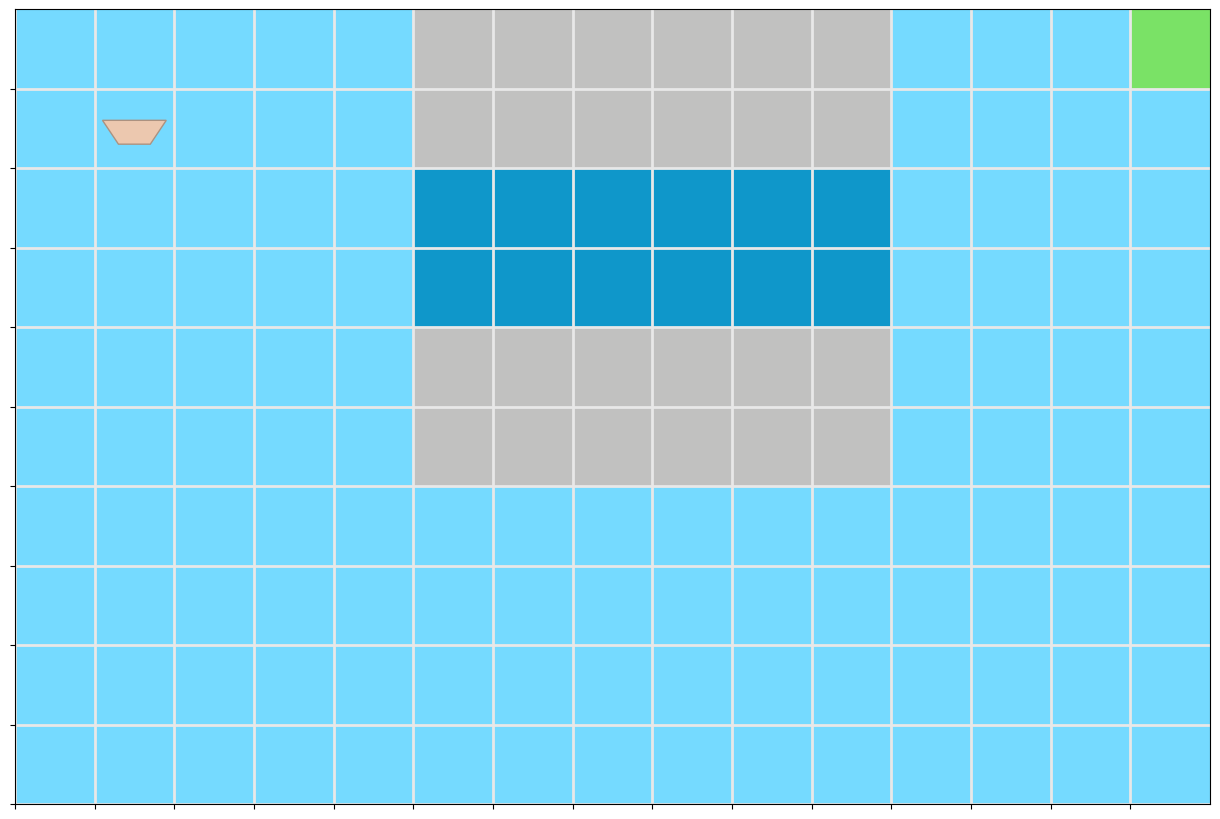

In [69]:
# Eval policy
N = 1000 # TODO: change for task 4
drs = []
for ep in range(N):
    state = env.reset()
    done = False
    dr = 0
    i = 0
    while not done:

        ########## You code starts here ##########

        # TODO: Use the policy to take the optimal action (Task 1)
        action = policy[state[0], state[1]]

        # Take a step in the environment
        state, reward, done, _ = env.step(action)
        
        # TODO: Calculate discounted return for the initial state
        dr += reward * np.power(.9, i)
        
        ########## You code ends here ##########
        
        # Comment out the line below to disable rendering and make computations faster
#         env.render()
        i += 1
    
    print(dr)
    drs.append(dr)


print('mean', np.mean(drs))
print('std', np.std(drs))

In [38]:
# save value and policy
h.save_object({'value': value_est, 'policy': policy}, './value_policy.pkl')